In [ ]:
#Description: This progrm uses the Moving Average Convergence/Divergence (MACD)crossover
# to determine when to buy and sell stock


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
#Load the dta
from google.colab import files
uploaded=files.upload()

Saving PDD1.csv to PDD1.csv


In [14]:
#store the data into a df
df = pd.read_csv('PDD1.csv')
#set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-25,2019-11-25,35.009998,36.740002,35.000000,36.520000,36.520000,18964500
2019-11-26,2019-11-26,36.000000,37.060001,35.730000,36.980000,36.980000,10286900
2019-11-27,2019-11-27,37.290001,37.779999,35.349998,35.860001,35.860001,7346700
2019-11-29,2019-11-29,35.680000,36.240002,35.230000,35.950001,35.950001,3424700
2019-12-02,2019-12-02,35.860001,36.110001,34.509998,36.040001,36.040001,4846300
...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,146.279999,149.050003,140.720001,142.029999,142.029999,12832300
2020-11-17,2020-11-17,132.429993,139.360001,129.460007,132.369995,132.369995,18008500
2020-11-18,2020-11-18,129.880005,134.490005,128.800003,132.380005,132.380005,19277300
2020-11-19,2020-11-19,134.440002,139.880005,132.960007,137.660004,137.660004,10866900


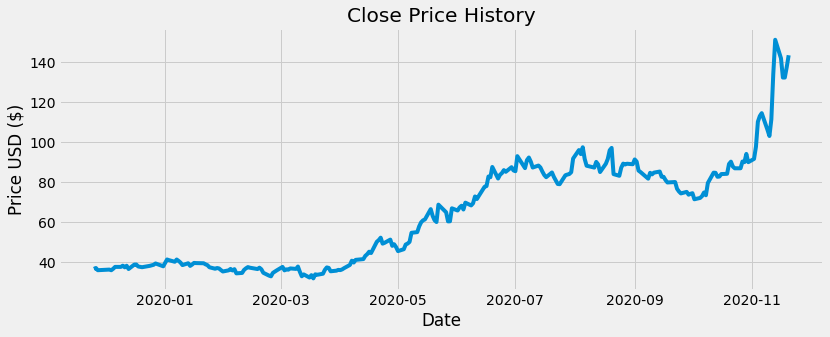

In [15]:
#Visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [17]:
#Calculate the MACD and Signal Line indicators
#calculate the short term exponential moving average (EMA)
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
#Calculate the long term exponential moving average(EMA)
LongEMA = df.Close.ewm(span=26,adjust=False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9,adjust=False).mean()

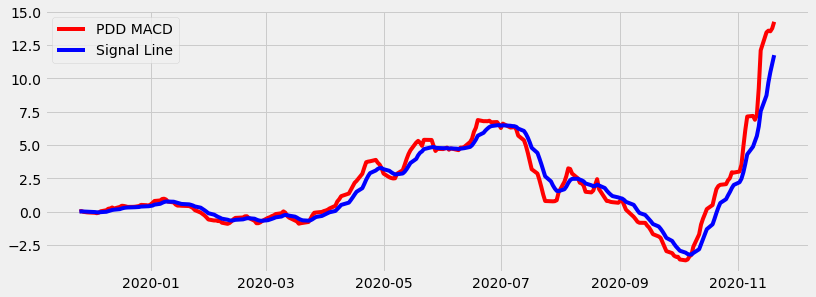

In [19]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,MACD,label='PDD MACD',color='red')
plt.plot(df.index,signal,label='Signal Line',color = 'blue')
plt.legend(loc='upper left')
plt.show()

In [21]:
#Create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2019-11-25,2019-11-25,35.009998,36.740002,35.000000,36.520000,36.520000,18964500,0.000000,0.000000
2019-11-26,2019-11-26,36.000000,37.060001,35.730000,36.980000,36.980000,10286900,0.036695,0.007339
2019-11-27,2019-11-27,37.290001,37.779999,35.349998,35.860001,35.860001,7346700,-0.024318,0.001008
2019-11-29,2019-11-29,35.680000,36.240002,35.230000,35.950001,35.950001,3424700,-0.064664,-0.012127
2019-12-02,2019-12-02,35.860001,36.110001,34.509998,36.040001,36.040001,4846300,-0.088357,-0.027373
...,...,...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,146.279999,149.050003,140.720001,142.029999,142.029999,12832300,13.448877,8.714211
2020-11-17,2020-11-17,132.429993,139.360001,129.460007,132.369995,132.369995,18008500,13.579286,9.687226
2020-11-18,2020-11-18,129.880005,134.490005,128.800003,132.380005,132.380005,19277300,13.527508,10.455283
2020-11-19,2020-11-19,134.440002,139.880005,132.960007,137.660004,137.660004,10866900,13.753977,11.115022


In [35]:
#Create a function to signal when to buy adn sell and asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0,len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan) 
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
    
  return (Buy,Sell)

In [36]:
#Create Buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

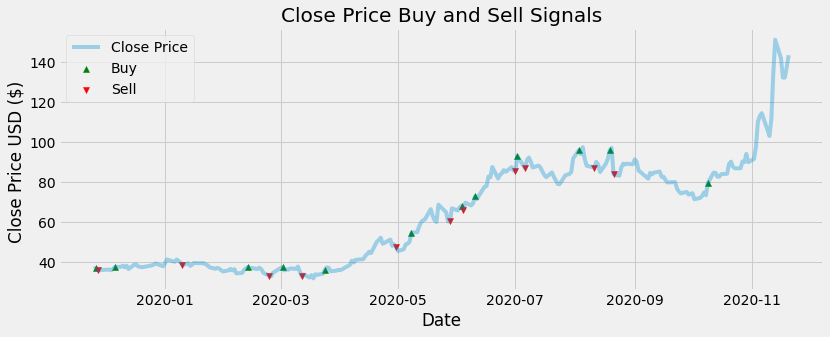

In [39]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy_Signal_Price'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['Sell_Signal_Price'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($) ')
plt.legend(loc='upper left')
plt.show()
